# Exploration 7. find face

## Step1. 사진 모으기

비교하려면 사진을 모아야겠죠? 우선 나만 볼 테니 내 사진과 비교해 보고 싶은 연예인 사진을 모아봅시다.  
평소에 닮았다고 생각했던 연예인 사진들을 모두 모아보는 것도 좋을 것 같네요.

[(233, 911, 788, 356)]


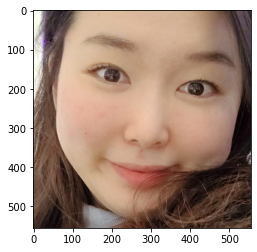

In [1]:
import face_recognition
import os

image_path = os.getenv('HOME')+'/aiffel/face_embedding/images/고은1.jpg'
image = face_recognition.load_image_file(image_path)
face_locations = face_recognition.face_locations(image)

print(face_locations)  # 이미지에서 얼굴 영역의 좌표를 출력합니다.

%matplotlib inline
import matplotlib.pyplot as plt

a, b, c, d = face_locations[0]
cropped_face = image[a:c,d:b,:]

plt.imshow(cropped_face)

## Step2. 얼굴 영역 자르기

임베딩 추출을 위해서는 얼굴 영역을 잘라줘야 합니다.   
위 Step1.에서 찾은 이미지들을 이전에 만들었던 get_gropped_face(image_file)을 통해서 잘라줍시다!  
자른 이미지는 PIL의 Image.fromarray를 통해서 PIL Image로 변환한 뒤에 저장을 해두면 다양한 재미있는 시각화를   
시도해 보는 데 도움이 될 것입니다. 

In [2]:
import face_recognition
import os

def get_gropped_face(image_file):
    image = face_recognition.load_image_file(image_file)
    face_locations = face_recognition.face_locations(image)
    a, b, c, d = face_locations[0]
    cropped_face = image[a:c,d:b,:]

    return cropped_face

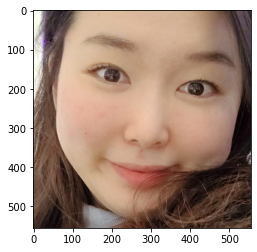

In [3]:
image_path = os.getenv('HOME')+'/aiffel/face_embedding/images/고은1.jpg'

cropped_face = get_gropped_face(image_path)
plt.imshow(cropped_face)

## Step3. 얼굴 영역의 임베딩 추출하기

이제 얼굴 영역으로 잘린 이미지들이 여럿 생겼을 텐데요.  
그 이미지를 face_recognition 을 사용해서 이미지를 불러오고 임베딩을 추출해 봅시다.  
다른 사람의 임베딩은 구분할 수 있게 따로 저장해 주세요.  
이전에 만들었던 다음 함수들을 활용하면 손쉽게 수행 가능합니다. 

In [4]:

    #def get_face_embedding(face) : 얼굴영역으로부터 얼굴 임베딩 벡터를 구하는 함수
    #def get_face_embedding_dict(dir_path) : 디렉토리 안에 있는 모든 이미지의 임베딩 딕셔너리를 구하는 함수


In [5]:
import os

dir_path = os.getenv('HOME')+'/aiffel/face_embedding/images'
file_list = os.listdir(dir_path)

print ("file_list: {}".format(file_list))

file_list: ['잇지예지.jpeg', '유희열.jpeg', '이준혁.jpeg', '리아.jpg', '로저 무어.jpeg', '손호준.jpeg', '잭 니콜슨.jpeg', '주진모(올드).jpg', '정수빈.jpg', '찬열.jpeg', '줄리엔강.png', '황병국.jpg', '목진화.png', '클린트 이스트우드.jpg', '이제훈.jpeg', '슈퍼비.jpeg', '김고은.jpeg', '류진.jpg', '노무현.jpeg', '공유.jpg', '트와이스정연.jpg', '산들.jpeg', '효정.jpg', '이광수.jpg', '앤드류 응.png', '온앤오프라운.jpg', '조원희.jpg', '하승진.jpg', '온앤오프와이엇.jpg', '장도연.jpg', '윤도현.png', '야마다 타카유키.jpeg', '김대중.jpg', '문재인.jpeg', '채연.jpg', '지코.jpg', '조인성.jpg', '곽도원.jpg', '강동원.jpg', '돈스파이크.jpg', '리사.jpg', '스윙스.jpeg', '톰 홀랜드.jpg', '트와이스모모.jpeg', '이대호.jpeg', '김구라.jpg', '이효리.jpg', '장성호.jpeg', '최양락.jpg', '브래들리 쿠퍼.jpg', '박용택.jpg', '김남주.jpeg', '여자아이들수진.jpeg', '방시혁.jpeg', '김종서.jpg', '이경규.jpeg', '류승룡.jpeg', '고창석.jpeg', '성룡.jpg', '박건우.png', '조이.jpg', '이승철.jpeg', '박신양.png', 'biden.jpg', '오재원.jpg', '택연.jpg', '류준열.jpg', '꽈두룹.jpeg', '김대명.jpeg', '심수창.jpeg', '박휘순.jpg', 'clinton.jpeg', '정민철.jpg', '로다주.jpeg', '솔라.jpg', '제프리 힌턴.jpg', '박진영.jpg', '뷔.png', '조정석.jpg', '김경진.png', '황정민.jpg', '슈가.jpg', '로제.jpg', '티모시 

In [6]:
image_file = os.path.join(dir_path, '고은1.jpg')
face = get_gropped_face(image_file)   # 얼굴 영역을 구하는 함수(이전 스텝에서 구현)

# 얼굴 영역을 가지고 얼굴 임베딩 벡터를 구하는 함수
def get_face_embedding(face):
    return face_recognition.face_encodings(face)

embedding = get_face_embedding(face)  
embedding

[array([-7.93580562e-02,  5.13040274e-02,  7.41104931e-02, -5.55113666e-02,
        -1.11281924e-01, -2.02039257e-04, -9.06511843e-02, -7.16496110e-02,
         1.33773163e-01, -1.35773763e-01,  2.16965809e-01, -1.07140504e-01,
        -2.14474857e-01, -4.27578166e-02, -8.48025680e-02,  2.58002847e-01,
        -2.29926914e-01, -1.62649795e-01,  7.35599454e-03,  2.09957510e-02,
         7.10131004e-02,  5.80359586e-02, -2.45414451e-02,  8.85643810e-03,
        -1.21860936e-01, -3.71085048e-01, -7.86750093e-02, -6.74525052e-02,
        -4.19801287e-02, -7.61641189e-02, -3.28162424e-02,  1.11063190e-01,
        -1.26953691e-01,  1.91138163e-02,  3.78505066e-02,  9.18789059e-02,
         2.17404775e-03, -9.39667001e-02,  1.31691903e-01, -6.05878886e-03,
        -3.15590054e-01,  2.33009420e-02,  1.01837501e-01,  2.29655072e-01,
         1.39871046e-01, -1.43120177e-02, -1.11812353e-03, -1.23816952e-01,
         9.20663625e-02, -1.64741889e-01, -3.31797674e-02,  1.31809697e-01,
         6.3

In [7]:
def get_face_embedding_dict(dir_path):
    file_list = os.listdir(dir_path)
    embedding_dict = {}

    for file in file_list:
        img_path = os.path.join(dir_path, file)
        face = get_gropped_face(img_path)
        embedding = get_face_embedding(face)
        if len(embedding) > 0:  # 얼굴영역 face가 제대로 detect되지 않으면  len(embedding)==0인 경우가 발생하므로 
                    # os.path.splitext(file)[0]에는 이미지파일명에서 확장자를 제거한 이름이 담깁니다. 
            embedding_dict[os.path.splitext(file)[0]] = embedding[0]

    return embedding_dict

In [10]:
#embedding_dict = get_face_embedding_dict(dir_path)
#embedding_dict['고은1.JPG']

In [11]:
import numpy as np

A = np.array([-7.93580562e-02,  5.13040274e-02,  7.41104931e-02, -5.55113666e-02,
       -1.11281924e-01, -2.02039257e-04, -9.06511843e-02, -7.16496110e-02,
        1.33773163e-01, -1.35773763e-01,  2.16965809e-01, -1.07140504e-01,
       -2.14474857e-01, -4.27578166e-02, -8.48025680e-02,  2.58002847e-01,
       -2.29926914e-01, -1.62649795e-01,  7.35599454e-03,  2.09957510e-02,
        7.10131004e-02,  5.80359586e-02, -2.45414451e-02,  8.85643810e-03,
       -1.21860936e-01, -3.71085048e-01, -7.86750093e-02, -6.74525052e-02,
       -4.19801287e-02, -7.61641189e-02, -3.28162424e-02,  1.11063190e-01,
       -1.26953691e-01,  1.91138163e-02,  3.78505066e-02,  9.18789059e-02,
        2.17404775e-03, -9.39667001e-02,  1.31691903e-01, -6.05878886e-03,
       -3.15590054e-01,  2.33009420e-02,  1.01837501e-01,  2.29655072e-01,
        1.39871046e-01, -1.43120177e-02, -1.11812353e-03, -1.23816952e-01,
        9.20663625e-02, -1.64741889e-01, -3.31797674e-02,  1.31809697e-01,
        6.34009093e-02,  5.15645370e-02,  5.54668382e-02, -1.19976625e-01,
        1.15967719e-02,  7.70753771e-02, -9.33680534e-02, -1.68095101e-02,
        5.90642504e-02, -7.03764707e-02,  4.51680981e-02, -1.28361031e-01,
        1.77750498e-01,  2.62085870e-02, -8.92904103e-02, -2.05903262e-01,
        1.32414162e-01, -1.22796126e-01, -1.18499920e-01,  8.13366100e-02,
       -1.35635570e-01, -1.87872887e-01, -2.94065356e-01, -5.02641201e-02,
        3.07611287e-01,  6.66425377e-02, -1.69871375e-01,  1.19497016e-01,
        5.02141714e-02, -3.86218727e-02,  9.58330780e-02,  2.31455386e-01,
        3.97327021e-02,  8.96271244e-02, -7.74213448e-02, -1.41369095e-02,
        2.29747698e-01, -1.02708727e-01,  1.18645104e-02,  2.03830048e-01,
       -4.36945595e-02,  5.68876937e-02,  3.53182703e-02,  2.11897083e-02,
       -5.65156378e-02,  7.44117200e-02, -1.17432266e-01, -1.01876408e-02,
        3.61448415e-02, -3.39382552e-02, -3.05292532e-02,  1.06079258e-01,
       -1.03314877e-01,  8.56901035e-02, -1.86968893e-02,  4.68578041e-02,
        1.70758124e-02,  4.73614894e-02, -4.29395214e-02, -6.40757456e-02,
        1.34555832e-01, -2.18605354e-01,  1.52849644e-01,  1.63374245e-01,
        2.34484412e-02,  9.55923647e-02,  1.14042126e-01,  1.08290769e-01,
       -3.44806388e-02, -1.77758113e-02, -2.19936535e-01, -2.06086189e-02,
        7.90622681e-02, -4.82445061e-02,  2.06643678e-02,  1.20917223e-02])
print("슝=3")

슝=3


In [12]:
distances = np.linalg.norm([A, B] - C, axis=1, ord=2)
print("Distance between A and C: {}".format(distances[0]))
print("Distance between B and C: {}".format(distances[1]))

NameError: name 'B' is not defined

In [13]:
distances = np.linalg.norm([A, B] - C, axis=1, ord=1)
print("Distance between A and C: {}".format(distances[0]))
print("Distance between B and C: {}".format(distances[1]))

NameError: name 'B' is not defined

In [14]:
import numpy as np

x = np.array([1,2,3,4,5])
y = np.array([2,3,4,5,6])

print(np.linalg.norm(y-x, ord=1))  #L1 distance
print(np.linalg.norm(y-x, ord=2))  #L2 distance

5.0
2.23606797749979


In [15]:
def get_distance(name1, name2):
    return np.linalg.norm(embedding_dict[name1]-embedding_dict[name2], ord=2)

get_distance('고은1', '고은2')

NameError: name 'embedding_dict' is not defined

## Step4. 모은 연예인들과 비교하기

모은 연예인 사진들과 자신의 얼굴 사진에서 추출한 임베딩 벡터들 간의 거리를 비교해 보고 가장 작은 연예인이 누구인지 찾아봅시다!

이전 스텝에서 만들었던 get_nearest_face(name, top=5) 함수들을 응용하면 손쉽게 수행 가능합니다. 

In [ ]:
# name1과 name2의 거리를 비교하는 함수를 생성하되, name1은 미리 지정하고, name2는 호출시에 인자로 받도록 합니다.
def get_sort_key_func(name1):
    def get_distance_from_name1(name2):
        return get_distance(name1, name2)
    return get_distance_from_name1

sort_key_func = get_sort_key_func('고은1')   
# 이렇게 생성된 함수 sort_key_func는 sort_key_func('obama') 라고 호출할 때 trump와 obama 사이의 임베딩 벡터 거리를 계산합니다.

In [ ]:
sorted(embedding_dict.items(), key=lambda x:sort_key_func(x[0]))

In [ ]:
def get_nearest_face(name, top=5):
    sort_key_func = get_sort_key_func(name)
    sorted_faces = sorted(embedding_dict.items(), key=lambda x:sort_key_func(x[0]))

    for i in range(top+1):
        if i == 0 :   # 첫번째로 나오는 이름은 자기 자신일 것이므로 제외합시다. 
            continue
        if sorted_faces[i]:
            print('순위 {} : 이름({}), 거리({})'.format(i, sorted_faces[i][0], sort_key_func(sorted_faces[i][0])))


In [16]:
get_nearest_face('고은2')

NameError: name 'get_nearest_face' is not defined